### Problem Statement

This case study is to predict the Flight ticket cost between various Fights Company.

### Import Libraries

In [1]:
# suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimentional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

from math import radians, cos, sin, sqrt, asin

import sklearn
# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split,cross_val_score # Used to split data arrays or matrices into random training and testing subsets for model evaluation.
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Functions to scale, normalize, and transform data (e.g., standardization, encoding categorical variables, and scaling features)
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Used to build a random forest model for regression tasks, combining multiple decision trees to improve prediction accuracy and control overfitting

In [2]:
# Set the plot size using 'rcParams'
# Once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file.
# Pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

### Set Options

1. Display complete dataframe
2. To set the decimal place of a numeric output to 6

In [3]:
# Display all columns of the dataframe
pd.options.display.max_columns = None

# Display all rows of the dataframe
pd.options.display.max_rows = None

# Returns an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

In [4]:
os.chdir(r"D:\Machine_Learning_Dataset\Random Forest\Flight Price Dataset")

### Read Data

In [5]:
# Read excel file using pandas
df_flight = pd.read_excel('Flight_Price_Train.xlsx')

# Display the top 5 rows of the dataframe
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Prepare and Analyse the Data

In [6]:
# 'shape' returns the dimensions of the date
df_flight.shape

(10683, 11)

##### Check the data type

In [7]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
# Drop null values in the column Route and Total_stops as the number is very minimal '1'
df_flight = df_flight.dropna(subset=['Route','Total_Stops'])

In [9]:
# use 'dtypes' to check the data type of each variable
df_flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Summary Statistis

In [10]:
df_flight.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10682,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10682,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10682,5,Delhi,4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10682,6,Cochin,4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10682,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10682,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10682,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10682,10,No info,8344,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Missing Values

In [11]:
Total = df_flight.isnull().sum().sort_values(ascending = False)

Percent = (df_flight.isnull().sum()*100/df_flight.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data['Type'] = df_flight[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
Airline,0,0.000000,object
Date_of_Journey,0,0.000000,object
Source,0,0.000000,object
Destination,0,0.000000,object
Route,0,0.000000,object
Dep_Time,0,0.000000,object
Arrival_Time,0,0.000000,object
Duration,0,0.000000,object
Total_Stops,0,0.000000,object
Additional_Info,0,0.000000,object


##### Visualize missing values using heatmap

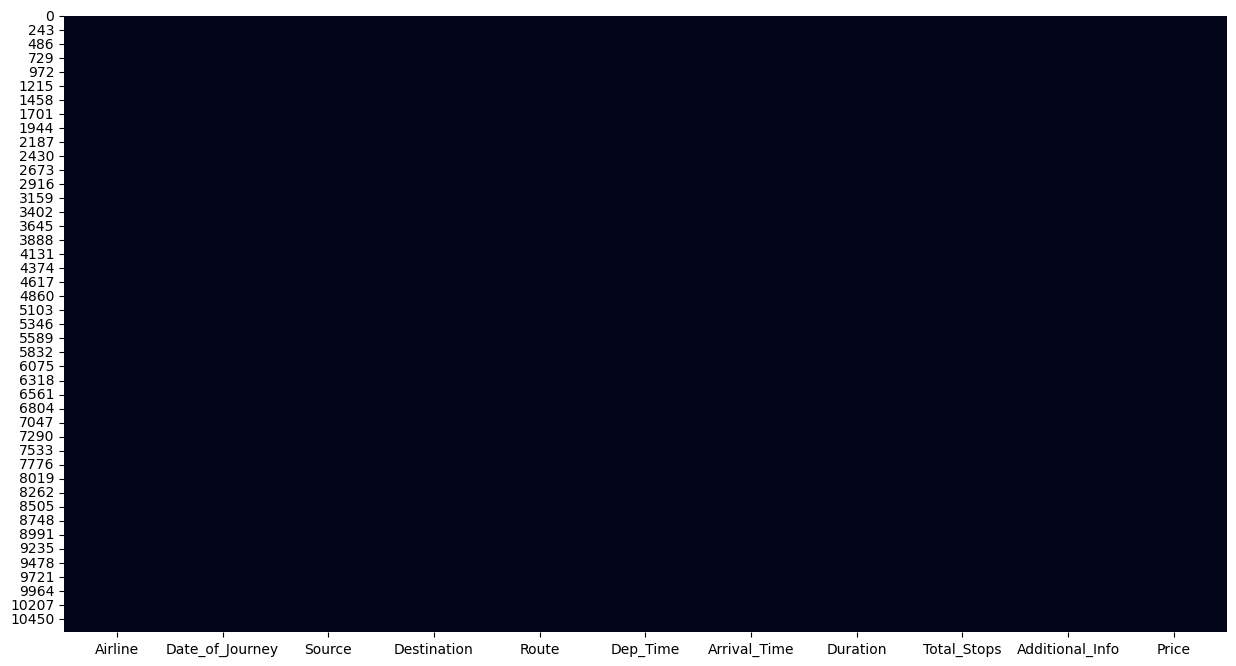

In [12]:
sns.heatmap(df_flight.isnull(), cbar = False)
plt.show()

### Exploratory Data Analysis

 ##### 1. Which airline is most preferred airline?

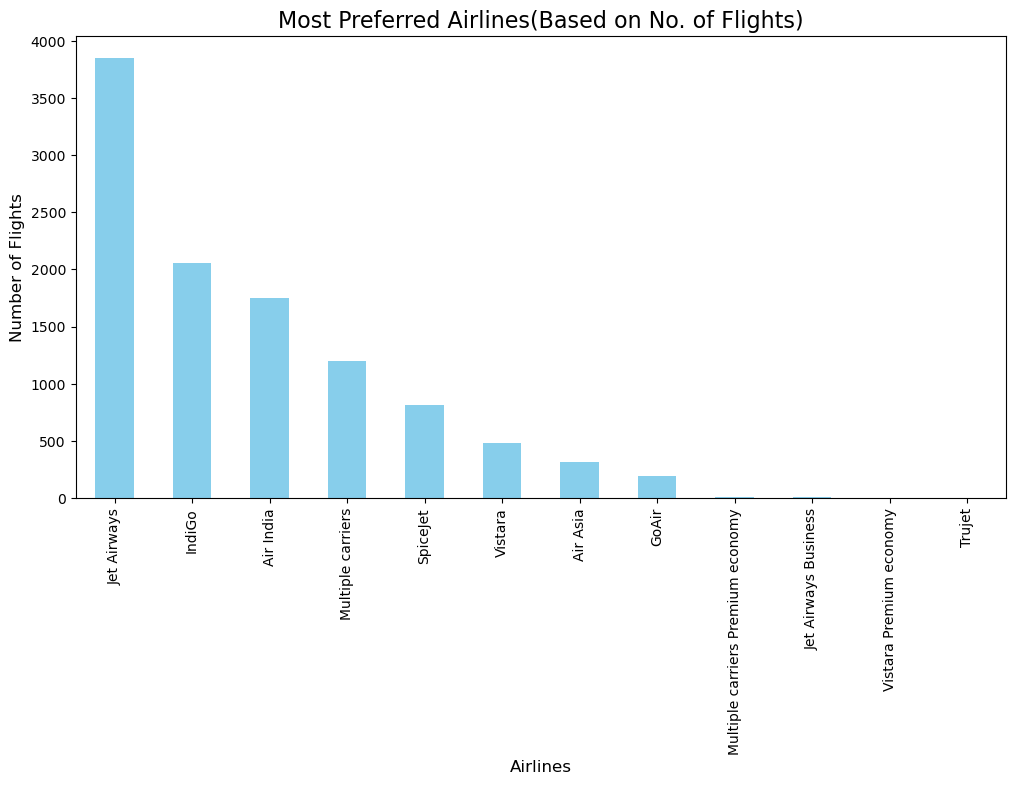

In [13]:
airline_counts = df_flight['Airline'].value_counts()

plt.figure(figsize = (12,6))
airline_counts.plot(kind = 'bar', color = 'skyblue')
plt.title('Most Preferred Airlines(Based on No. of Flights)', fontsize = 16)
plt.xlabel('Airlines', fontsize = 12)
plt.ylabel('Number of Flights', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

##### 2. Find the majority of the flights take off from which source?

In [14]:
df_flight['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [15]:
# Check how many times 'Delhi' and 'New Delhi' appear in the 'Destination' column
delhi_count = df_flight[df_flight['Destination'].str.contains("Delhi", case=False)]['Destination'].value_counts()

# Print the counts for 'Delhi' and 'New Delhi'
print(delhi_count)

Destination
Delhi        1265
New Delhi     932
Name: count, dtype: int64


In [16]:
# Replace 'New Delhi' with 'Delhi'
df_flight['Destination'] = df_flight['Destination'].replace('New Delhi', 'Delhi')

# Now check the unique destinations again to confirm the change
df_flight['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [17]:
df_flight['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

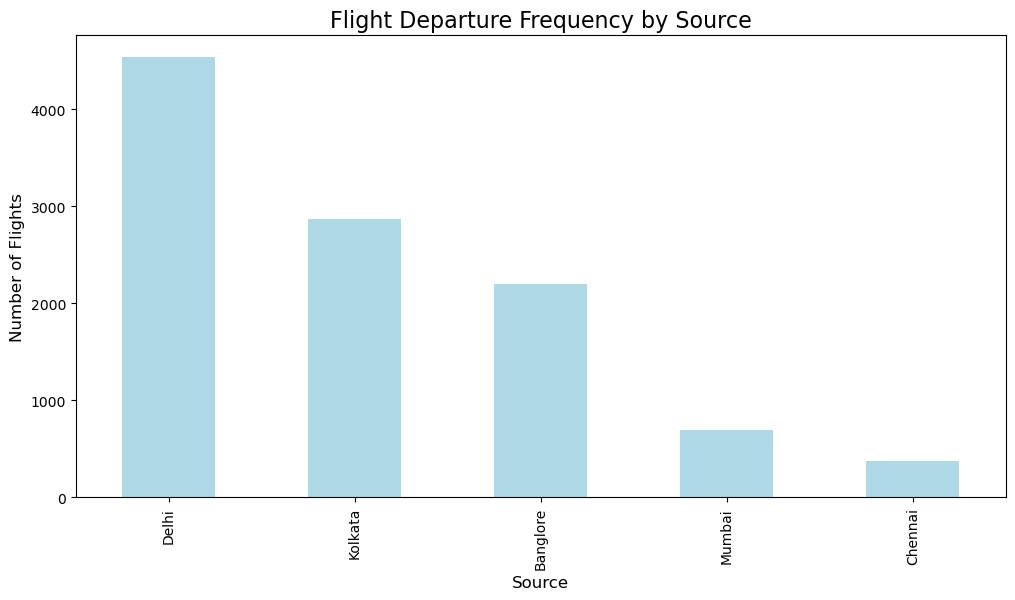

In [18]:
source_counts = df_flight['Source'].value_counts()

plt.figure(figsize=(12, 6))
source_counts.plot(kind='bar', color='lightblue')
plt.title('Flight Departure Frequency by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### 3. Find maximum flights land in which destination?

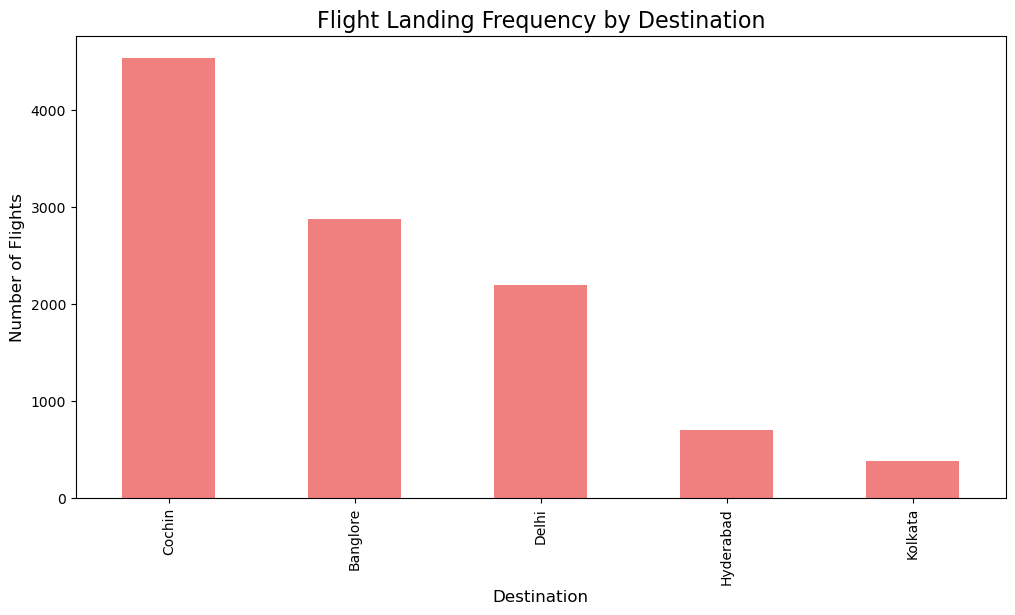

In [19]:
destination_counts = df_flight['Destination'].value_counts()

plt.figure(figsize=(12, 6))
destination_counts.plot(kind='bar', color='lightcoral')
plt.title('Flight Landing Frequency by Destination', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### 4. Which airline has the highest price?

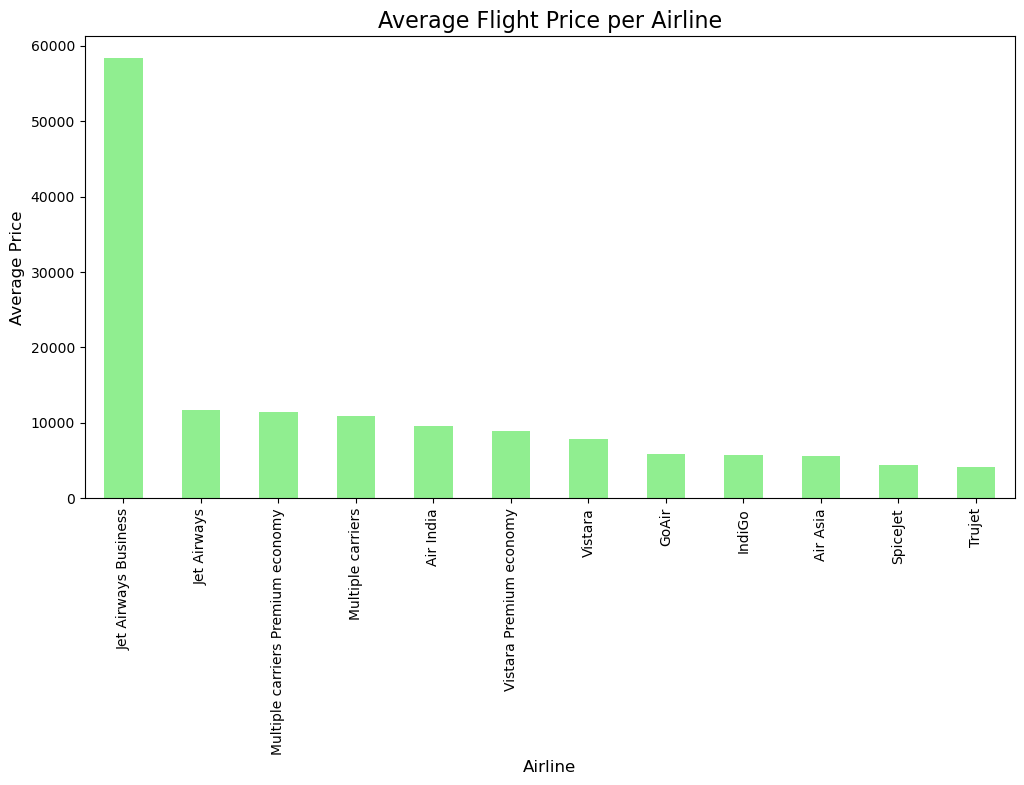

In [20]:
airline_avg_price = df_flight.groupby('Airline')['Price'].mean()

plt.figure(figsize = (12, 6))
airline_avg_price.sort_values(ascending = False).plot(kind = 'bar', color = 'lightgreen')
plt.title('Average Flight Price per Airline', fontsize = 16)
plt.xlabel('Airline', fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

### Discover Outliers

##### Box Plot

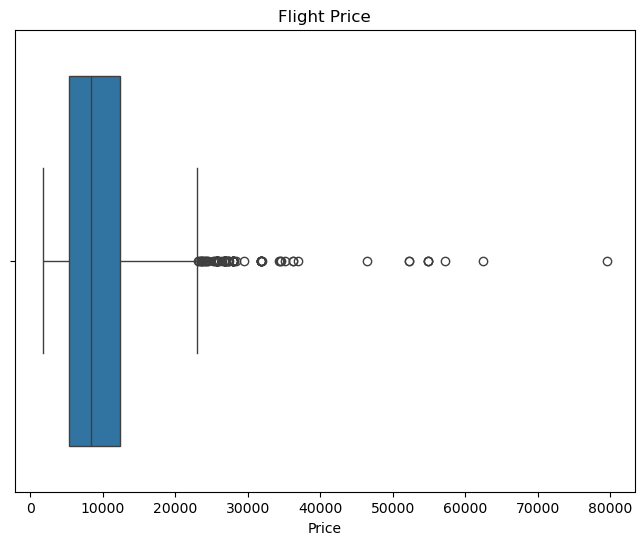

In [21]:
plt.figure(figsize = (8,6))
sns.boxplot(x=df_flight['Price'])
plt.title('Flight Price')
plt.xlabel('Price')
plt.show()

##### Using IQR method to remove Outliers

In [22]:
Q1 = df_flight['Price'].quantile(0.25)
Q3 = df_flight['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_flight = df_flight[(df_flight['Price'] >= lower_bound) & (df_flight['Price'] <= upper_bound)]

#print(f"Original dataset size: {df_flight.shape}")
#print(f"Dataset size after removing Outliers: {flight.shape}")

In [23]:
#plt.figure(figsize = (8,6))
#sns.boxplot(x=flight['Price'])
#plt.title('Flight Price')
#plt.xlabel('Price')
#plt.show()

### Feature Engineering

##### Change the incorrect data type

In [24]:
# Convert object to datetime for the below using to_datetime method from pandas
# Date_of_Journey, Dep_Time, Arrival_Time
# If error is set to'coerce', then invalid parsing will be set as NaN
# Using errors=’coerce’. It will replace all non-numeric values with NaN

df_flight.Date_of_Journey = pd.to_datetime(df_flight.Date_of_Journey, errors = 'coerce')
df_flight.Dep_Time = pd.to_datetime(df_flight.Dep_Time, errors = 'coerce')
df_flight.Arrival_Time = pd.to_datetime(df_flight.Arrival_Time, errors = 'coerce')

In [25]:
# Convert object to int for Total Stops
df_flight['Total_Stops'] = df_flight['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

##### Feature addition

In [26]:
df_flight = df_flight.assign(
                        Journey_Day = df_flight.Date_of_Journey.dt.day,
                        Journey_Month = df_flight.Date_of_Journey.dt.month,
                        Dep_Hour = df_flight.Dep_Time.dt.hour
)
#Journey_Year = df_flight.Date_of_Journey.dt.year
#Arrival_Hour = df_flight.Arrival_Time.dt.hour

In [27]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2025-03-31 22:20:00,2025-03-22 01:10:00,2h 50m,0,No info,3897,24,3,22
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-31 05:50:00,2025-03-31 13:15:00,7h 25m,2,No info,7662,1,5,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-31 09:25:00,2025-06-10 04:25:00,19h,2,No info,13882,9,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-31 18:05:00,2025-03-31 23:30:00,5h 25m,1,No info,6218,12,5,18
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,2025-03-31 16:50:00,2025-03-31 21:35:00,4h 45m,1,No info,13302,1,3,16


In [28]:
# Step 1: Extract hours from the 'Duration' column and create 'Duration_hour' column
df_flight['Duration_hour'] = df_flight['Duration'].str.replace('h', '').str.replace('m', '').str[0:].str.split(' ', expand=True)[0].fillna(0).astype('int32')

# Step 2: Extract minutes from the 'Duration' column and create 'Duration_min' column
df_flight['Duration_min'] = df_flight['Duration'].str.replace('h', '').str.replace('m', '').str[0:].str.split(' ', expand=True)[1].fillna(0).astype('int32')

# Step 3: Calculate the total duration in minutes and store it in 'Duration'
df_flight['Duration'] = df_flight['Duration_hour'] * 60 + df_flight['Duration_min']

##### Drop the redundant variables

In [29]:
# Drop below columns after extracting the necesary details
df_flight.drop(['Duration_hour', 'Duration_min', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [30]:
# Drop Route and Additional Info to avoid High dimensionality, Multicollinearity and Overfitting
df_flight.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

##### Recheck the data type after the conversion

In [31]:
df_flight.dtypes

Airline          object
Source           object
Destination      object
Duration          int32
Total_Stops       int64
Price             int64
Journey_Day       int32
Journey_Month     int32
Dep_Hour          int32
dtype: object

In [32]:
df_flight.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour
0,IndiGo,Banglore,Delhi,170,0,3897,24,3,22
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18
4,IndiGo,Banglore,Delhi,285,1,13302,1,3,16


### Preprocessing

##### Split the features and target into seperate data frames

In [33]:
X = df_flight.drop(columns=["Price"])
y = df_flight["Price"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The shape of X_train:",X_train.shape)
print("The shape of X_test:",X_test.shape)
print("The shape of y_train:",y_train.shape)
print("The shape of y_test:",y_test.shape)

The shape of X_train: (8470, 8)
The shape of X_test: (2118, 8)
The shape of y_train: (8470,)
The shape of y_test: (2118,)


In [35]:
categorical_cols = ["Airline", "Source", "Destination"]
numerical_cols = [
    "Duration", "Total_Stops", "Journey_Month", "Journey_Day", "Dep_Hour"
]

In [36]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

##### Creating Pipeline

In [39]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Duration', 'Total_Stops',
                                                   'Journey_Month',
                                                   'Journey_Day', 'Dep_Hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('model', RandomForestRegressor(random_state=42))])

##### 5. Model Evaluation

In [41]:
y_pred = pipeline.predict(X_test)

In [42]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [43]:
print(f"✅ Random Forest R² Score (Test Set): {r2:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")

✅ Random Forest R² Score (Test Set): 0.7999
✅ Mean Squared Error (MSE): 3279082.21
✅ Root Mean Squared Error (RMSE): 1810.82


### Hyperparameter Tuning

In [44]:
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [10, 20, 30, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

In [45]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Duration',
                                                                          'Total_Stops',
                                                                          'Journey_Month',
                                                                          'Journey_Day',
                                                                          'Dep_Hour']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, 30, None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [46]:
best_model = grid_search.best_estimator_

In [47]:
y_pred_tuned = best_model.predict(X_test)

In [48]:
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

In [49]:
print(f"✅ Tuned Random Forest R² Score: {r2_tuned:.4f}")
print(f"✅ Tuned MSE: {mse_tuned:.2f}")
print(f"✅ Tuned RMSE: {rmse_tuned:.2f}")

✅ Tuned Random Forest R² Score: 0.8306
✅ Tuned MSE: 2775301.50
✅ Tuned RMSE: 1665.92


In [50]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Tuned Random Forest"],
    "R² Score (Test Set)": [f"{r2:.4f}", f"{r2_tuned:.4f}"],
    "Mean Squared Error (MSE)": [f"{mse:.2f}", f"{mse_tuned:.2f}"],
    "Root Mean Squared Error (RMSE)": [f"{rmse:.2f}", f"{rmse_tuned:.2f}"]
})

In [51]:
from IPython.display import display
display(results)

,Model,R² Score (Test Set),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,Random Forest,0.7999,3279082.21,1810.82
1,Tuned Random Forest,0.8306,2775301.50,1665.92


In [52]:
import os

cwd = os.getcwd()  # Get current directory
print("Current Working Directory:", cwd)

Current Working Directory: D:\Machine_Learning_Dataset\Random Forest\Flight Price Dataset


In [53]:
os.chdir(r"C:\Users\Erappa Monnanda\Machine_Learning_Loading\Flight")
print("Updated Directory:", os.getcwd())

Updated Directory: C:\Users\Erappa Monnanda\Machine_Learning_Loading\Flight


In [58]:
import pickle

#Save the trained pipeline as a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("✅ Model saved successfully as 'model.pkl'")

✅ Model saved successfully as 'model.pkl'
